Uniform steps

In this task, I choose steps uniformly in the interval $[-1,1]$, as suggested by professor Roberto imbuzeiro. 

Intuition:
When we observe the graphics of quantiles by size of box (in the standard randon walk), we can see little kinks or jumps, it's happens because $S_n$ takes values on a discrete set, then inverse CDF has jumps, so we expect that taking a random variable with continuous CDF makes the graphic of quantiles by size of box smoother.

Conclusion:
Indeed the graphics looks smoother, and gives coefficients of diffusion closer to $0.5$ than using steps ${+1,-1}$

 ---- diffusion constant is approximally 0.4980606270156805 using quantile 0.45 ----


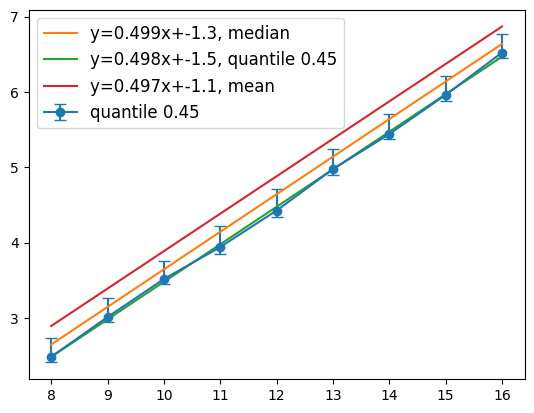

 ---- diffusion constant is approximally 0.4987315136146313 using quantile 0.5 ----


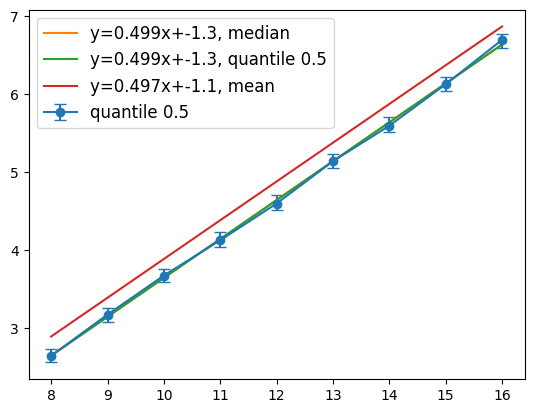

 ---- diffusion constant is approximally 0.4962149188866281 using quantile 0.55 ----


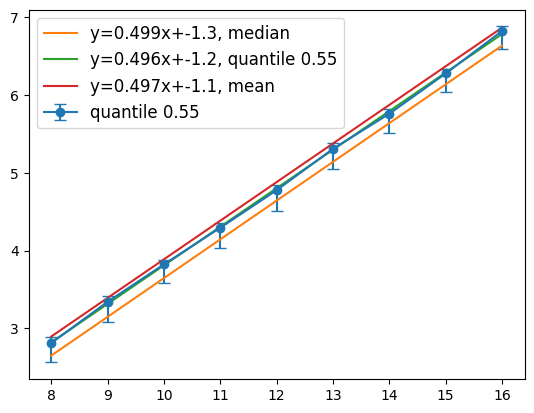

 ---- diffusion constant is approximally 0.5047438975649704 using quantile 0.45 ----


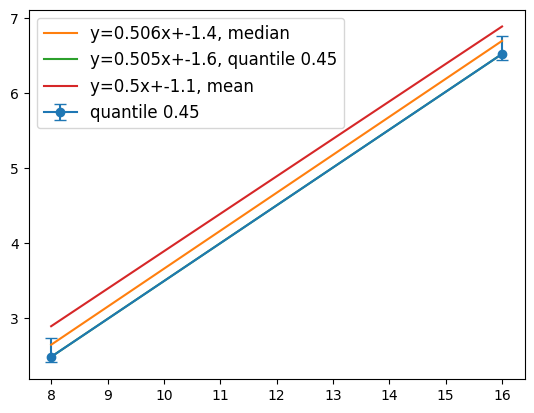

 ---- diffusion constant is approximally 0.5064220622670218 using quantile 0.5 ----


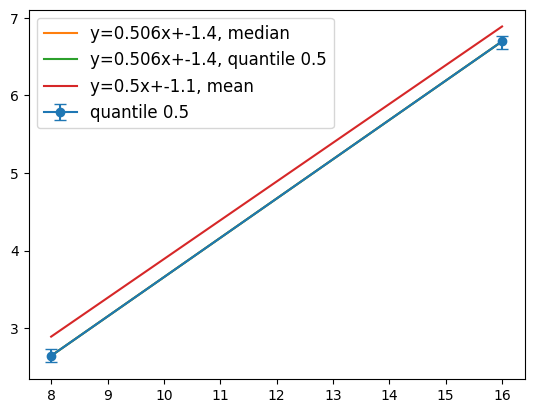

 ---- diffusion constant is approximally 0.5020186171896632 using quantile 0.55 ----


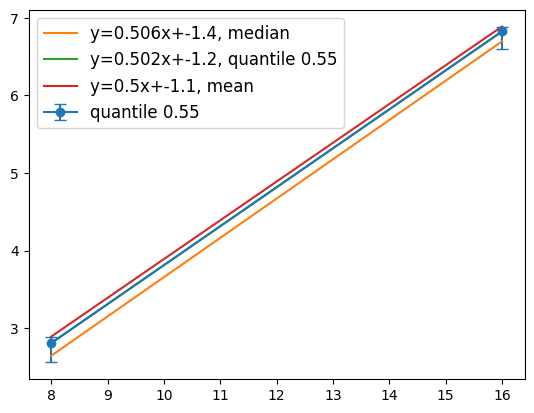

--- 109.80428051948547 seconds ---


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator

start_time = time.time()

seed(1998)
size = 17
point1 = 8
point2 = 17
numbsimul = 3200
Size = np.linspace(point1,size-1, size-point1)
Size_2points = np.linspace(point1,point2-1, 2)

A = np.zeros((size - point1,numbsimul ))
A_twopoints = np.zeros((2,numbsimul ))
# simulations of random walks

for k in range(point1,size):
    n=pow(2,k)
    
    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            x = x + 2*random() -1
        A[k-point1][j-1] = x
        if (k == point1):
            A_twopoints[0][j-1] = x
        if (k == point2-1):
            A_twopoints[1][j-1] = x

# taking absolute value of S_n, sorting the samples, calculate mean and median.
def treat_this_data(A):
    absA = np.abs(A)
    sortedAbs = np.sort(absA)
    meanA = absA.mean(1)
    median = np.quantile(absA, 0.5 , 1)
    return (absA,sortedAbs,meanA, median)

# calculating the interval of confidence
alpha = 0.001 # confidence level

def confidence_level(logq, size, sortedAbs):
    lowerboundindex = [math.floor(0.5*(numbsimul - math.sqrt(numbsimul)*norm.isf(alpha))) for i in range(size)]
    upperboundindex = [math.ceil(0.5*(numbsimul + math.sqrt(numbsimul)*norm.isf(alpha))) for i in range(size)]
    
    lowerboundheight = sortedAbs[np.arange(size),lowerboundindex]
    upperboundheight = sortedAbs[np.arange(size),upperboundindex]
    loglower = np.log(lowerboundheight)/np.log(2)
    logupper = np.log(upperboundheight)/np.log(2)

    errorbar = [np.abs(loglower-logq), np.abs(logupper-logq)]
    return errorbar


# calculating the linear regression of log map
def linear_regression(q, Size, A):
    B = treat_this_data(A)
    absA = B[0]
    sortedAbs = B[1]
    meanA = B[2]
    median = B[3]
    
    quantile = np.quantile(absA, q, 1)

    logquantile = np.log(quantile)/np.log(2)
    logmean = np.log(meanA)/np.log(2)
    logmedian = np.log(median)/np.log(2)

    poly = np.polyfit(Size, logquantile, 1)
    pmean = np.polyfit(Size, logmean, 1)
    pmedian = np.polyfit(Size, logmedian, 1)

    print(" ---- diffusion constant is approximally %s using quantile %s ----" % (poly[0],q))

    errorbar = confidence_level(logquantile, len(Size), sortedAbs)
    plt.errorbar(Size,logquantile,yerr=errorbar, label = 'quantile {:.2}'.format(q),capsize=4, marker = 'o')
    plt.plot(Size, pmedian[1]+pmedian[0]*Size, label='y={:.3}x+{:.2}, median'.format(pmedian[0],pmedian[1]))
    plt.plot(Size, poly[1]+poly[0]*Size, label='y={:.3}x+{:.2}, quantile {:.2}'.format(poly[0],poly[1],q))
    plt.plot(Size, pmean[1]+pmean[0]*Size, label='y={:.3}x+{:.2}, mean'.format(pmean[0],pmean[1]))

    plt.legend(fontsize=12)
    plt.show()  
#quantiles

linear_regression(0.45, Size, A)
linear_regression(0.5 , Size, A)
linear_regression(0.55, Size, A)


linear_regression(0.45, Size_2points, A_twopoints)
linear_regression(0.50, Size_2points, A_twopoints)
linear_regression(0.55, Size_2points, A_twopoints)

print("--- %s seconds ---" % (time.time() - start_time))